# LSTM을 이용한 주가 예측

본 실습은 LSTM 아키텍처를 이용한 neural network를 구성해서 주가를 예측해봅니다. 이 실습 코드는 https://github.com/llSourcell/How-to-Predict-Stock-Prices-Easily-Demo 를 바탕으로 작성되었습니다.

### 1. 필요한 라이브러리 Import

* keras: Dense (Fully connected layer), Activation 함수, Dropout 함수를 사용하기 위해서 import
* lstm-stockprice: 학습 데이터 준비, 모델 정의 등
* time

In [3]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm_stockprice, time #helper libraries

### 2. 학습 데이터 로딩

과거의 S&P 500 가격 데이터를 학습 데이터와 검증 데이터로 90:10 비율로 나눕니다.

In [9]:
X_train, y_train, X_test, y_test = lstm_stockprice.load_data('sp500.csv', 50, True)

### 3. LSTM 네트워크 정의

Input --> LSTM --> LSTM --> Dense --> Linear Activation

In [6]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

compilation time :  0.0162229537964


### 4. 학습 수행

다음과 같은 설정으로 학습을 수행합니다.

* batch_size
* nb_epoch
* validation_split

학습이 수행되는 과정에서, loss값과 val_loss값이 어떻게 변하고 있는지 관찰해보세요.

In [7]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=10,
    validation_split=0.05)

Train on 2109 samples, validate on 112 samples
Epoch 1/10
2109/2109 [==============================] - 4s - loss: 0.0764 - val_loss: 0.0067
Epoch 2/10
2109/2109 [==============================] - 4s - loss: 0.0070 - val_loss: 0.0058
Epoch 3/10
2109/2109 [==============================] - 4s - loss: 0.0060 - val_loss: 0.0050
Epoch 4/10
2109/2109 [==============================] - 4s - loss: 0.0051 - val_loss: 0.0047
Epoch 5/10
2109/2109 [==============================] - 4s - loss: 0.0046 - val_loss: 0.0044
Epoch 6/10
2109/2109 [==============================] - 4s - loss: 0.0043 - val_loss: 0.0040
Epoch 7/10
2109/2109 [==============================] - 4s - loss: 0.0036 - val_loss: 0.0037
Epoch 8/10
2109/2109 [==============================] - 4s - loss: 0.0035 - val_loss: 0.0051
Epoch 9/10
2109/2109 [==============================] - 4s - loss: 0.0058 - val_loss: 0.0050
Epoch 10/10
2109/2109 [==============================] - 4s - loss: 0.0037 - val_loss: 0.0034


### 5. 예측한 결과를 그래프로 그래기

yo


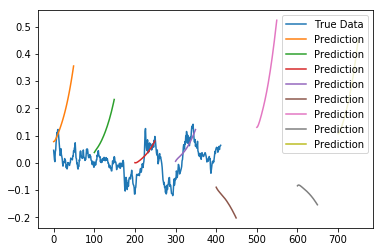

In [11]:
predictions = lstm_stockprice.predict_sequences_multiple(model, X_test, 50, 50)
lstm_stockprice.plot_results_multiple(predictions, y_test, 100)

> <font color='red'>문제</font>
>
> 1. 여러분이 원하는 회사의 주가 정보를 [Google Finance](https://www.google.com/finance?ei=6gafWZGyM9XD0AT4r7aQBQ)에서 검색해서 과거 주가 기록을 다운로드해서 모델을 다시 학습을 수행해보세요.
> 2. LSTM 레이어를 추가하거나, Dropout 값을 변경하면서 학습을 수행하면서 loss 값과 val_loss 값이 어떻게 변하는지 관찰해보세요.